In [12]:
import pandas as pd

In [346]:
# Read data and drop redundant column.
data = pd.read_csv('FInal.csv')

# Preview data.
display(data.head(60))



,Unnamed: 0,HomeTeam,AwayTeam,FTR,homeshots,awayshots,homeshotsT,awayshotsT,homefouls,awayfouls,...,HM2,AM2,HM3,AM3,HTP,ATP,HTGD,ATGD,DiffPts,DiffFormPts
0,0,Man United,Leicester,H,39.0,48.0,10.0,21.0,21.0,28.0,...,D,W,L,L,0.0,0.0,0.0,-1.0,0.0,6.0
1,3,Huddersfield,Chelsea,A,26.0,40.0,8.0,11.0,25.0,29.0,...,D,D,D,W,0.0,0.0,-1.0,-2.0,0.0,-3.0
2,4,Newcastle,Tottenham,A,39.0,43.0,10.0,18.0,30.0,31.0,...,L,W,L,L,0.0,0.0,1.0,1.0,0.0,-6.0
3,5,Watford,Brighton,H,31.0,19.0,16.0,8.0,30.0,18.0,...,W,L,L,W,0.0,0.0,-2.0,-5.0,0.0,-3.0
4,7,Arsenal,Man City,A,39.0,47.0,19.0,11.0,25.0,24.0,...,L,W,W,D,0.0,0.0,4.0,3.0,0.0,-6.0
5,8,Liverpool,West Ham,H,52.0,37.0,18.0,9.0,19.0,31.0,...,L,D,D,W,0.0,0.0,3.0,4.0,0.0,9.0
6,9,Southampton,Burnley,D,32.0,28.0,16.0,10.0,35.0,26.0,...,W,L,D,D,0.0,0.0,0.0,-6.0,0.0,-6.0
7,11,Chelsea,Arsenal,H,41.0,32.0,11.0,14.0,25.0,30.0,...,L,W,D,L,3.0,0.0,0.0,-3.0,3.0,3.0
8,12,Everton,Southampton,H,29.0,39.0,15.0,14.0,34.0,33.0,...,L,L,D,W,1.0,1.0,-2.0,0.0,0.0,0.0
9,15,West Ham,Bournemouth,A,29.0,41.0,8.0,14.0,31.0,30.0,...,W,W,D,W,0.0,3.0,-2.0,4.0,-3.0,-3.0


In [347]:
#what is the win rate for the home team?

# Total number of matches.
n_matches = data.shape[0]
# Calculate number of features. -1 because we are saving one as the target variable (win/lose/draw)
n_features = data.shape[1] - 1

# Calculate matches won by home team.
n_homewins = len(data[data.FTR == 'H'])

# Calculate win rate for home team.
win_rate = (float(n_homewins) / (n_matches)) * 100

# Print the results
print ("Total number of matches: {}",n_matches)
print ("Number of features: {}",n_features)
print ("Number of matches won by home team: {}",n_homewins)
print ("Win rate of home team: {:.2f}%",win_rate)

Total number of matches: {} 371
Number of features: {} 27
Number of matches won by home team: {} 177
Win rate of home team: {:.2f}% 47.7088948787062


In [23]:
data.columns
data=data.drop(['Unnamed: 0'],1)

Index(['HomeTeam', 'AwayTeam', 'FTR', 'homeshots', 'awayshots', 'homeshotsT',
       'awayshotsT', 'homefouls', 'awayfouls', 'homecorners', 'awaycorners',
       'homeyellow', 'awayyellow', 'homered', 'awayred', 'HM1', 'AM1', 'HM2',
       'AM2', 'HM3', 'AM3', 'HTP', 'ATP', 'HTGD', 'ATGD', 'DiffPts',
       'DiffFormPts'],
      dtype='object')

In [348]:


# Standardising the data.
from sklearn.preprocessing import scale

#Center to the mean and component wise scale to unit variance.
cols = [[ 'homeshots', 'awayshots', 'homeshotsT',
       'awayshotsT', 'homefouls', 'awayfouls', 'homecorners', 'awaycorners',
       'homeyellow', 'awayyellow', 'homered', 'awayred','HTGD','ATGD','HTP','ATP','DiffPts','DiffFormPts']]
for col in cols:
    data[col] = scale(data[col])

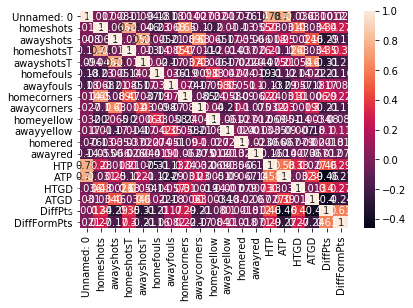

In [349]:
import seaborn as sn
import matplotlib.pyplot as plt
corrMatrix = data.corr()
sn.heatmap(corrMatrix, annot=True)
plt.show()

In [350]:
data

,Unnamed: 0,HomeTeam,AwayTeam,FTR,homeshots,awayshots,homeshotsT,awayshotsT,homefouls,awayfouls,...,HM2,AM2,HM3,AM3,HTP,ATP,HTGD,ATGD,DiffPts,DiffFormPts
0,0,Man United,Leicester,H,0.179784,0.948307,-0.598117,1.631637,-1.462790,-0.433818,...,D,W,L,L,-1.353851,-1.355051,0.020506,-0.292078,0.006136,1.393511
1,3,Huddersfield,Chelsea,A,-1.066048,0.183269,-1.021189,-0.432248,-0.864779,-0.277407,...,D,D,D,W,-1.353851,-1.355051,-0.241833,-0.554454,0.006136,-0.631264
2,4,Newcastle,Tottenham,A,0.179784,0.470158,-0.598117,1.012472,-0.117265,0.035414,...,L,W,L,L,-1.353851,-1.355051,0.282845,0.232672,0.006136,-1.306189
3,5,Watford,Brighton,H,-0.586882,-1.824956,0.671100,-1.051413,-0.117265,-1.997923,...,W,L,L,W,-1.353851,-1.355051,-0.504172,-1.341579,0.006136,-0.631264
4,7,Arsenal,Man City,A,0.179784,0.852677,1.305708,-0.432248,-0.864779,-1.059460,...,L,W,W,D,-1.353851,-1.355051,1.069863,0.757423,0.006136,-1.306189
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
366,375,Liverpool,Wolves,H,1.138117,0.278899,0.882636,-0.019471,-2.509309,0.348235,...,W,W,W,W,3.446291,1.546161,2.119219,1.019798,2.060509,0.718586
367,376,Man United,Cardiff,A,0.467284,-0.007991,0.036491,1.012472,-0.266768,-0.433818,...,D,L,L,L,2.016461,0.222801,-0.504172,-1.079204,1.949461,0.718586
368,377,Southampton,Huddersfield,D,0.371451,-1.251177,-0.175045,-1.257801,0.331243,1.286698,...,D,L,D,L,0.586632,-0.591574,-0.766511,-1.603955,1.283178,0.718586
369,378,Tottenham,Everton,D,1.617283,1.808974,0.248028,0.806083,-1.313287,0.504645,...,L,D,W,W,2.220723,1.342567,-0.241833,1.544549,0.950037,2.068435


In [71]:
data.corr()

,homeshots,awayshots,homeshotsT,awayshotsT,homefouls,awayfouls,homecorners,awaycorners,homeyellow,awayyellow,homered,awayred,HTP,ATP,HTGD,ATGD,DiffPts,DiffFormPts
homeshots,1.000000,-0.065556,0.737227,-0.045813,-0.226962,0.067610,0.653223,-0.104866,-0.201672,0.009989,-0.132293,-0.054562,0.282696,-0.030840,0.480562,-0.034172,0.341019,0.272838
awayshots,-0.065556,1.000000,-0.015248,0.734365,0.004959,-0.209606,-0.088761,0.634812,0.065010,-0.165588,0.034607,-0.065532,-0.018281,0.249559,-0.002135,0.457350,-0.292114,-0.167880
homeshotsT,0.737227,-0.015248,1.000000,-0.013058,-0.141742,0.085125,0.465289,-0.011217,-0.202421,-0.014412,-0.036873,-0.025533,0.206195,-0.115189,0.626740,-0.033773,0.349854,0.297418
awayshotsT,-0.045813,0.734365,-0.013058,1.000000,0.020089,-0.173160,-0.036664,0.427836,0.006035,-0.168990,-0.022166,0.004445,-0.075449,0.205771,0.053667,0.595231,-0.306505,-0.210911
homefouls,-0.226962,0.004959,-0.141742,0.020089,1.000000,0.036109,-0.185521,-0.009777,0.330748,0.042188,0.073919,-0.019397,-0.311386,-0.116279,-0.144434,0.021998,-0.211726,-0.163233
awayfouls,0.067610,-0.209606,0.085125,-0.173160,0.036109,1.000000,0.073777,-0.170449,-0.058259,0.348768,0.051259,0.104979,-0.132724,-0.288651,0.056896,-0.175601,0.170570,0.082394
homecorners,0.653223,-0.088761,0.465289,-0.036664,-0.185521,0.073777,1.000000,-0.085178,-0.240718,0.057883,-0.089732,-0.062062,0.235961,-0.030666,0.314379,-0.005952,0.290014,0.215145
awaycorners,-0.104866,0.634812,-0.011217,0.427836,-0.009777,-0.170449,-0.085178,1.000000,0.040021,-0.207289,0.104158,-0.074778,0.032145,0.227274,-0.001924,0.300144,-0.212975,-0.168479
homeyellow,-0.201672,0.065010,-0.202421,0.006035,0.330748,-0.058259,-0.240718,0.040021,1.000000,-0.060633,-0.026576,-0.011614,-0.068507,0.005120,-0.137268,-0.003352,-0.080074,-0.083796
awayyellow,0.009989,-0.165588,-0.014412,-0.168990,0.042188,0.348768,0.057883,-0.207289,-0.060633,1.000000,0.024186,0.001269,0.003466,-0.089733,-0.006979,-0.184163,0.101656,0.114375


In [351]:
X_all = data.drop(['FTR','HomeTeam','AwayTeam'],1)
#last 3 wins for both sides
X_all.HM1 = X_all.HM1.astype('str')
X_all.HM2 = X_all.HM2.astype('str')
X_all.HM3 = X_all.HM3.astype('str')
X_all.AM1 = X_all.AM1.astype('str')
X_all.AM2 = X_all.AM2.astype('str')
X_all.AM3 = X_all.AM3.astype('str')

#we want continous vars that are integers for our input data, so lets remove any categorical vars
def preprocess_features(X):
    ''' Preprocesses the football data and converts catagorical variables into dummy variables. '''
    
    # Initialize new output DataFrame
    output = pd.DataFrame(index = X.index)

    # Investigate each feature column for the data
    for col, col_data in X.iteritems():

        # If data type is categorical, convert to dummy variables
        if col_data.dtype == object:
            col_data = pd.get_dummies(col_data, prefix = col)
                    
        # Collect the revised columns
        output = output.join(col_data)
    
    return output

X_all = preprocess_features(X_all)
print ("Processed feature columns ({} total features):\n{}".format(len(X_all.columns), list(X_all.columns)))



Processed feature columns (37 total features):
['Unnamed: 0', 'homeshots', 'awayshots', 'homeshotsT', 'awayshotsT', 'homefouls', 'awayfouls', 'homecorners', 'awaycorners', 'homeyellow', 'awayyellow', 'homered', 'awayred', 'HM1_D', 'HM1_L', 'HM1_W', 'AM1_D', 'AM1_L', 'AM1_W', 'HM2_D', 'HM2_L', 'HM2_W', 'AM2_D', 'AM2_L', 'AM2_W', 'HM3_D', 'HM3_L', 'HM3_W', 'AM3_D', 'AM3_L', 'AM3_W', 'HTP', 'ATP', 'HTGD', 'ATGD', 'DiffPts', 'DiffFormPts']


In [363]:
X_all=X_all.drop(['homered','awayred','HM1_D', 'HM1_L', 'HM1_W', 'AM1_D', 'AM1_L', 'AM1_W', 'HM2_D', 'HM2_L', 'HM2_W', 'AM2_D', 'AM2_L', 'AM2_W', 'HM3_D', 'HM3_L', 'HM3_W', 'AM3_D', 'AM3_L', 'AM3_W'],1)

In [364]:
Y_all=data['FTR']
def only_hw(string):
    if string == 'H':
        return 'H'
    else:
        return 'NH'
    
Y_all = Y_all.apply(only_hw)
Y_all

0       H
1      NH
2      NH
3       H
4      NH
       ..
366     H
367    NH
368    NH
369    NH
370    NH
Name: FTR, Length: 371, dtype: object

In [365]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_all,Y_all, test_size=0.3, random_state=27)


In [366]:
print(X_train)  
print(y_train)

     Unnamed: 0  homeshots  awayshots  homeshotsT  awayshotsT  homefouls  \
74           83  -0.011882  -0.581769   -0.809653   -0.225859   1.975774   
256         265   0.467284   1.808974    0.882636    0.186918  -1.014282   
342         351  -1.161881   0.565788   -2.078870    0.599695   0.181741   
162         171  -0.107716  -0.964288   -0.598117   -0.638636   0.331243   
136         145  -0.586882   1.235196   -0.175045   -0.019471  -0.117265   
..          ...        ...        ...         ...         ...        ...   
312         321   0.083951   0.661418   -0.386581    0.599695   0.779752   
31           40  -0.011882  -1.155547   -0.386581   -0.225859  -0.266768   
328         337  -0.491048   0.757047   -0.598117    1.012472   0.181741   
184         193   2.863115  -0.773029    2.574925    0.186918  -2.210304   
19           28  -0.203549  -0.868658    0.248028    0.599695   1.377763   

     awayfouls  homecorners  awaycorners  homeyellow  awayyellow       HTP  \
74   -0.7

In [367]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

In [399]:
SVC_model = SVC(kernel='linear',random_state=1)
# KNN model requires you to specify n_neighbors,
# the number of points the classifier will look at to determine what class a new point belongs to
KNN_model = KNeighborsClassifier(n_neighbors=5,random_state=1)

In [400]:
SVC_model.fit(X_train, y_train)
KNN_model.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [401]:
SVC_prediction = SVC_model.predict(X_test)
KNN_prediction = KNN_model.predict(X_test)

In [402]:
# Accuracy score is the simplest way to evaluate
print(accuracy_score(SVC_prediction, y_test))
print(accuracy_score(KNN_prediction, y_test))
# But Confusion Matrix and Classification Report give more details about performance
print(confusion_matrix(SVC_prediction, y_test))
print(classification_report(KNN_prediction, y_test))

0.5982142857142857
0.5267857142857143
[[24 18]
 [27 43]]
              precision    recall  f1-score   support

           H       0.47      0.48      0.48        50
          NH       0.57      0.56      0.57        62

    accuracy                           0.53       112
   macro avg       0.52      0.52      0.52       112
weighted avg       0.53      0.53      0.53       112



In [403]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from matplotlib import pyplot

model = RandomForestClassifier()
model.fit(X_train, y_train)
y_predict = model.predict(X_test)

accuracy_score(y_test.values, y_predict)

0.6428571428571429

Feature: 0, Score: 0.06020
Feature: 1, Score: 0.06875
Feature: 2, Score: 0.05660
Feature: 3, Score: 0.05803
Feature: 4, Score: 0.05238
Feature: 5, Score: 0.04352
Feature: 6, Score: 0.05520
Feature: 7, Score: 0.08096
Feature: 8, Score: 0.06176
Feature: 9, Score: 0.03443
Feature: 10, Score: 0.06090
Feature: 11, Score: 0.06068
Feature: 12, Score: 0.04443
Feature: 13, Score: 0.05980
Feature: 14, Score: 0.04716
Feature: 15, Score: 0.12403
Feature: 16, Score: 0.03117


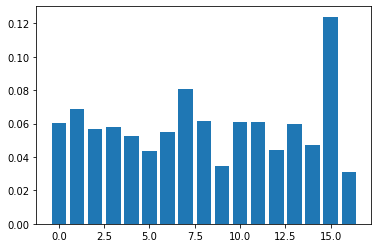

In [380]:
# get importance
importance = model.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

In [381]:
X_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 371 entries, 0 to 370
Data columns (total 17 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   371 non-null    int64  
 1   homeshots    371 non-null    float64
 2   awayshots    371 non-null    float64
 3   homeshotsT   371 non-null    float64
 4   awayshotsT   371 non-null    float64
 5   homefouls    371 non-null    float64
 6   awayfouls    371 non-null    float64
 7   homecorners  371 non-null    float64
 8   awaycorners  371 non-null    float64
 9   homeyellow   371 non-null    float64
 10  awayyellow   371 non-null    float64
 11  HTP          371 non-null    float64
 12  ATP          371 non-null    float64
 13  HTGD         371 non-null    float64
 14  ATGD         371 non-null    float64
 15  DiffPts      371 non-null    float64
 16  DiffFormPts  371 non-null    float64
dtypes: float64(16), int64(1)
memory usage: 49.4 KB


In [382]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from scipy.stats import uniform, truncnorm, randint
model_params = {
    # randomly sample numbers from 4 to 250 estimators
    'n_estimators': randint(low=50, high=200),
    # normally distributed max_features, with mean .25 stddev 0.1, bounded between 0 and 1
    'max_features':  randint(low=1, high=15),
    # uniform distribution from 0.01 to 0.2 (0.01 + 0.199)
    'min_samples_split': uniform(0.01, 0.199)
}

In [383]:
 #create random forest classifier model
rf_model = RandomForestClassifier(random_state=13)

# set up random search meta-estimator
# this will train 100 models over 5 folds of cross validation (500 models total)
clf = RandomizedSearchCV(rf_model, model_params, n_iter=50,cv=10, random_state=1)

# train the random search meta-estimator to find the best model out of 100 candidates
model = clf.fit(X_train, y_train)

# print winning set of hyperparameters
from pprint import pprint
pprint(model.best_estimator_.get_params())

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 12,
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 0.17067086645319526,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 86,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 13,
 'verbose': 0,
 'warm_start': False}


In [384]:
# generate predictions using the best-performing model
predictions = model.predict(X_test)

In [385]:
accuracy_score(y_test.values, predictions)

0.6785714285714286

In [408]:
import xgboost as xgb
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer

parameters = { 'learning_rate' : [0.1],
               'n_estimators' : [40],
               'max_depth': [3],
               'min_child_weight': [3],
               'gamma':[0.4],
               'subsample' : [0.8],
               'colsample_bytree' : [0.8],
               'scale_pos_weight' : [1],
               'reg_alpha':[1e-5]
             }  

# TODO: Initialize the classifier
xgb_model= xgb.XGBClassifier(seed=2)



# TODO: Perform grid search on the classifier using the f1_scorer as the scoring method
clf= GridSearchCV(xgb_model,param_grid=parameters, n_jobs=50,cv=10)

# TODO: Fit the grid search object to the training data and find the optimal parameters
model = clf.fit(X_train,y_train)


In [409]:
# generate predictions using the best-performing model
predictions = model.predict(X_test)
accuracy_score(y_test.values, predictions)

0.6875

In [386]:
import xgboost as xgb
model=xgb.XGBClassifier(random_state=1,learning_rate=0.01)
model.fit(X_train, y_train)
model.score(X_test,y_test)

0.5982142857142857

In [387]:
# importing required libraries
import pandas as pd
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

In [388]:
model = XGBClassifier()
 
# fit the model with the training data
model.fit(X_train,y_train)
 
 
# predict the target on the train dataset
predict_train = model.predict(X_train)
print('\nTarget on train data',predict_train) 
 
# Accuray Score on train dataset
accuracy_train = accuracy_score(y_train,predict_train)
print('\naccuracy_score on train dataset : ', accuracy_train)
 
# predict the target on the test dataset
predict_test = model.predict(X_test)
print('\nTarget on test data',predict_test) 
 
# Accuracy Score on test dataset
accuracy_test = accuracy_score(y_test,predict_test)
print('\naccuracy_score on test dataset : ', accuracy_test)



Target on train data ['NH' 'NH' 'NH' 'H' 'NH' 'NH' 'NH' 'NH' 'H' 'NH' 'NH' 'NH' 'NH' 'NH' 'NH'
 'NH' 'H' 'H' 'NH' 'NH' 'H' 'H' 'H' 'H' 'H' 'H' 'NH' 'H' 'H' 'H' 'H' 'NH'
 'H' 'H' 'H' 'H' 'H' 'NH' 'H' 'H' 'H' 'NH' 'H' 'H' 'NH' 'H' 'NH' 'H' 'H'
 'NH' 'H' 'NH' 'H' 'NH' 'H' 'H' 'NH' 'H' 'H' 'NH' 'NH' 'H' 'H' 'H' 'H'
 'NH' 'NH' 'NH' 'NH' 'NH' 'NH' 'H' 'H' 'H' 'NH' 'NH' 'H' 'H' 'NH' 'H' 'H'
 'H' 'NH' 'NH' 'NH' 'NH' 'H' 'NH' 'NH' 'H' 'H' 'NH' 'H' 'NH' 'NH' 'H' 'NH'
 'H' 'H' 'NH' 'NH' 'H' 'NH' 'H' 'NH' 'NH' 'H' 'H' 'H' 'NH' 'H' 'NH' 'NH'
 'H' 'NH' 'H' 'H' 'H' 'H' 'NH' 'NH' 'NH' 'NH' 'H' 'H' 'H' 'H' 'H' 'NH'
 'NH' 'H' 'NH' 'H' 'H' 'NH' 'NH' 'NH' 'NH' 'NH' 'NH' 'H' 'H' 'NH' 'NH'
 'NH' 'NH' 'H' 'NH' 'NH' 'NH' 'NH' 'NH' 'H' 'NH' 'H' 'NH' 'NH' 'NH' 'H'
 'H' 'NH' 'NH' 'H' 'H' 'H' 'NH' 'NH' 'H' 'NH' 'H' 'H' 'NH' 'H' 'NH' 'H'
 'H' 'H' 'NH' 'H' 'NH' 'NH' 'H' 'NH' 'NH' 'NH' 'H' 'NH' 'NH' 'NH' 'NH' 'H'
 'H' 'H' 'NH' 'H' 'H' 'H' 'NH' 'NH' 'NH' 'H' 'NH' 'NH' 'NH' 'H' 'NH' 'NH'
 'NH' 'NH' 'H' 'NH' 'NH' 'NH'

In [389]:
#for measuring training time
from time import time 
# F1 score (also F-score or F-measure) is a measure of a test's accuracy. 
#It considers both the precision p and the recall r of the test to compute 
#the score: p is the number of correct positive results divided by the number of 
#all positive results, and r is the number of correct positive results divided by 
#the number of positive results that should have been returned. The F1 score can be 
#interpreted as a weighted average of the precision and recall, where an F1 score 
#reaches its best value at 1 and worst at 0.
from sklearn.metrics import f1_score

def train_classifier(clf, X_train, y_train):
    ''' Fits a classifier to the training data. '''
    
    # Start the clock, train the classifier, then stop the clock
    start = time()
    clf.fit(X_train, y_train)
    end = time()
    
    # Print the results
    print ("Trained model in {:.4f} seconds".format(end - start))

    
def predict_labels(clf, features, target):
    ''' Makes predictions using a fit classifier based on F1 score. '''
    
    # Start the clock, make predictions, then stop the clock
    start = time()
    y_pred = clf.predict(features)
    
    end = time()
    # Print and return results
    print ("Made predictions in {:.4f} seconds.".format(end - start))
    
    return f1_score(target, y_pred, pos_label='H',average='micro'), sum(target == y_pred) / float(len(y_pred))


def train_predict(clf, X_train, y_train, X_test, y_test):
    ''' Train and predict using a classifer based on F1 score. '''
    
    # Indicate the classifier and the training set size
    print ("Training a {} using a training set size of {}. . .".format(clf.__class__.__name__, len(X_train)))
    
    # Train the classifier
    train_classifier(clf, X_train, y_train)
    
    # Print the results of prediction for both training and testing
    f1, acc = predict_labels(clf, X_train, y_train)
    print (f1, acc)
    print ("F1 score and accuracy score for training set: {:.4f} , {:.4f}.".format(f1 , acc))
    
    f1, acc = predict_labels(clf, X_test, y_test)
    print ("F1 score and accuracy score for test set: {:.4f} , {:.4f}.".format(f1 , acc))

In [390]:
# Initialize the three models (XGBoost is initialized later)
clf_A = LogisticRegression(random_state = 42)
clf_B = SVC(random_state = 912, kernel='rbf')
#Boosting refers to this general problem of producing a very accurate prediction rule 
#by combining rough and moderately inaccurate rules-of-thumb
clf_C = xgb.XGBClassifier(seed = 82)

train_predict(clf_A, X_train, y_train, X_test, y_test)
print ('')
train_predict(clf_B, X_train, y_train, X_test, y_test)
print ('')
train_predict(clf_C, X_train, y_train, X_test, y_test)
print ('')

Training a LogisticRegression using a training set size of 259. . .


C:\Users\nihal\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\nihal\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1321: UserWarning: Note that pos_label (set to 'H') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)
C:\Users\nihal\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1321: UserWarning: Note that pos_label (set to 'H') is ignored when average != 'binary' (got 'micro'). Y

Trained model in 0.3552 seconds
Made predictions in 0.0000 seconds.
0.6988416988416989 0.6988416988416989
F1 score and accuracy score for training set: 0.6988 , 0.6988.
Made predictions in 0.0000 seconds.
F1 score and accuracy score for test set: 0.6071 , 0.6071.

Training a SVC using a training set size of 259. . .
Trained model in 0.0202 seconds
Made predictions in 0.0101 seconds.
0.5212355212355212 0.5212355212355212
F1 score and accuracy score for training set: 0.5212 , 0.5212.
Made predictions in 0.0101 seconds.
F1 score and accuracy score for test set: 0.4554 , 0.4554.

Training a XGBClassifier using a training set size of 259. . .
Trained model in 0.3548 seconds
Made predictions in 0.0101 seconds.
1.0 1.0
F1 score and accuracy score for training set: 1.0000 , 1.0000.
Made predictions in 0.0101 seconds.
F1 score and accuracy score for test set: 0.6071 , 0.6071.



In [391]:
import pandas as pd
#produces a prediction model in the form of an ensemble of weak prediction models, typically decision tree
import xgboost as xgb
#the outcome (dependent variable) has only a limited number of possible values. 
#Logistic Regression is used when response variable is categorical in nature.
from sklearn.linear_model import LogisticRegression
#A random forest is a meta estimator that fits a number of decision tree classifiers 
#on various sub-samples of the dataset and use averaging to improve the predictive 
#accuracy and control over-fitting.
from sklearn.ensemble import RandomForestClassifier
#a discriminative classifier formally defined by a separating hyperplane.
from sklearn.svm import SVC
#displayd data
from IPython.display import display
%matplotlib inline

In [394]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer


# TODO: Create the parameters list you wish to tune
parameters = { 'learning_rate' : [0.1],
               'n_estimators' : [40],
               'max_depth': [3],
               'min_child_weight': [3],
               'gamma':[0.4],
               'subsample' : [0.8],
               'colsample_bytree' : [0.8],
               'scale_pos_weight' : [1],
               'reg_alpha':[1e-5]
             }  

# TODO: Initialize the classifier
clf = xgb.XGBClassifier(seed=2)

# TODO: Make an f1 scoring function using 'make_scorer' 
f1_scorer = make_scorer(f1_score,pos_label='H')

# TODO: Perform grid search on the classifier using the f1_scorer as the scoring method
grid_obj = GridSearchCV(clf,
                        scoring=f1_scorer,
                        param_grid=parameters,
                        cv=5)

# TODO: Fit the grid search object to the training data and find the optimal parameters
grid_obj = grid_obj.fit(X_train,y_train)

# Get the estimator
clf = grid_obj.best_estimator_
print (clf)

# Report the final F1 score for training and testing after parameter tuning
f1, acc = predict_labels(clf, X_train, y_train)
print ("F1 score and accuracy score for training set: {:.4f} , {:.4f}.".format(f1 , acc))
    
f1, acc = predict_labels(clf, X_test, y_test)
print ("F1 score and accuracy score for test set: {:.4f} , {:.4f}.".format(f1 , acc))

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.8, gamma=0.4, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=3, missing=nan, monotone_constraints='()',
              n_estimators=40, n_jobs=0, num_parallel_tree=1,
              objective='binary:logistic', random_state=2, reg_alpha=1e-05,
              reg_lambda=1, scale_pos_weight=1, seed=2, subsample=0.8,
              tree_method='exact', validate_parameters=1, verbosity=None)
Made predictions in 0.0080 seconds.
F1 score and accuracy score for training set: 0.8108 , 0.8108.
Made predictions in 0.0040 seconds.
F1 score and accuracy score for test set: 0.6875 , 0.6875.


C:\Users\nihal\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1321: UserWarning: Note that pos_label (set to 'H') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)


In [412]:
from sklearn.model_selection import GridSearchCV 
  
# defining parameter range 
param_grid = {'C': [0.1, 1, 10, 100, 1000],  
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 
              'kernel': ['rbf']}  
  
grid = GridSearchCV(SVC(), param_grid,cv=10,n_jobs=10, refit = True, verbose = 3) 
  
# fitting the model for grid search 
grid.fit(X_train, y_train) 

Fitting 10 folds for each of 25 candidates, totalling 250 fits


[Parallel(n_jobs=10)]: Using backend LokyBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done  12 tasks      | elapsed:   17.8s
[Parallel(n_jobs=10)]: Done 108 tasks      | elapsed:   21.1s
[Parallel(n_jobs=10)]: Done 250 out of 250 | elapsed:   25.1s finished


GridSearchCV(cv=10, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=10,
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=3)

In [413]:
grid_predictions = grid.predict(X_test) 
  
# print classification report 
print(classification_report(y_test, grid_predictions)) 

              precision    recall  f1-score   support

           H       0.54      0.43      0.48        51
          NH       0.59      0.69      0.64        61

    accuracy                           0.57       112
   macro avg       0.56      0.56      0.56       112
weighted avg       0.57      0.57      0.56       112

